# 聚类分析

In [2]:
import math
import numpy as np


def euler_distance(point1, point2):
    distance = 0.0
    for a, b in zip(point1, point2):
        distance += math.pow(a-b, 2)
    return math.sqrt(distance)

# 定义聚类树的节点
class ClusterNode:
    def __init__(self, vec, left=None, right=None, distance=-1, id=None, count=1):
        """
        vec: 保存两个数据merge后新的中心
        left: 左节点
        right: 右节点
        distance: 两个节点的距离
        id: 保存哪个节点是计算过的
        count: 这个节点的叶子节点个数
        """
        self.vec = vec
        self.left = left
        self.right = right
        self.distance = distance
        self.id = id
        self.count = count

# 层次聚类的类
# 不同于文中所说的先构建树，再进行切分，而是直接根据所需类别数目，聚到满足条件的节点数量即停止
# 和k-means一样，也需要指定类别数量
class Hierarchical:
    def __init__(self, k=1):
        assert k > 0
        self.k = k
        self.labels = None
    def fit(self, x):
        # 初始化节点各位等于数据的个数
        nodes = [ClusterNode(vec=v, id=i) for i, v in enumerate(x)]
        distance = {}
        point_num, feature_num = np.shape(x)
        self.labels = [-1] * point_num
        currentclustid = -1
        while len(nodes) > self.k:
            min_dist = np.inf
            # 当前节点的个数
            nodes_len = len(nodes)
            # 最相似的两个类别
            closest_part = None
            # 当前节点中两两距离计算，找出最近的两个节点
            for i in range(nodes_len-1):
                for j in range(i+1, nodes_len):
                    # 避免重复计算
                    d_key = (nodes[i].id, nodes[j].id)
                    if d_key not in distance:
                        distance[d_key] = euler_distance(nodes[i].vec, nodes[j].vec)
                    d = distance[d_key]
                    if d < min_dist:
                        min_dist = d
                        closest_part = (i, j)
            part1, part2 = closest_part
            node1, node2 = nodes[part1], nodes[part2]
            # 将两个节点进行合并,即两个节点所包含的所有数据的平均值
            new_vec = [(node1.vec[i] * node1.count + node2.vec[i] * node2.count) / (node1.count + node2.count)
                       for i in range(feature_num)]
            new_node = ClusterNode(vec=new_vec, left=node1, right=node2, distance=min_dist, id=currentclustid,
                                   count=node1.count + node2.count)
            currentclustid -= 1
            # 删掉这最近的两个节点
            del nodes[part2], nodes[part1]
            # 把新的节点添加进去
            nodes.append(new_node)
        # 树建立完成，这里要注意，在示例中是最终凝聚为1个节点，而这里到达所要指定的类别数目即停止，一个node属于一个类别
        self.nodes = nodes
        # 给每个node以及node包含的数据打上标签
        self.calc_label()

    def calc_label(self):
        # 调取聚类结果
        for i, node in enumerate(self.nodes):
            self.leaf_traversal(node, i)

    def leaf_traversal(self, node: ClusterNode, label):
        # 递归遍历叶子结点
        if node.left is None and node.right is None:
            self.labels[node.id] = label
        if node.left:
            self.leaf_traversal(node.left, label)
        if node.right:
            self.leaf_traversal(node.right, label)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 1 1 1 1 3 1 1 1 2
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 2
 1 2]


/Users/luoyp/Software/miniconda3/envs/py_new/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


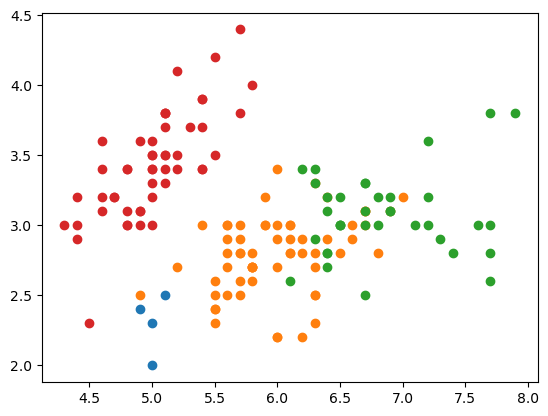

In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()

my = Hierarchical(4)
my.fit(iris.data)
data = iris.data
data_0 = data[np.nonzero(np.array(my.labels) == 0)]
data_1 = data[np.nonzero(np.array(my.labels) == 1)]
data_2 = data[np.nonzero(np.array(my.labels) == 2)]
data_3 = data[np.nonzero(np.array(my.labels) == 3)]
plt.scatter(data_0[:, 0], data_0[:, 1])
plt.scatter(data_1[:, 0], data_1[:, 1])
plt.scatter(data_2[:, 0], data_2[:, 1])
plt.scatter(data_3[:, 0], data_3[:, 1])

print(np.array(my.labels))

from sklearn.cluster import KMeans
km = KMeans(4)
km.fit(iris.data)
print(km.labels_)
data_0_ = data[np.nonzero(np.array(km.labels_) == 0)]
data_1_ = data[np.nonzero(np.array(km.labels_) == 1)]
data_2_ = data[np.nonzero(np.array(km.labels_) == 2)]
data_3_ = data[np.nonzero(np.array(km.labels_) == 3)]
plt.figure()
plt.scatter(data_0_[:, 0], data_0_[:, 1])
plt.scatter(data_1_[:, 0], data_1_[:, 1])
plt.scatter(data_2_[:, 0], data_2_[:, 1])
plt.scatter(data_3_[:, 0], data_3_[:, 1])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', memory=None, connectivity=None,
                                compute_full_tree='auto', linkage='ward', pooling_func='deprecated')
"""
参数：
    n_cluster: 聚类数目
    affinity: 计算距离的方法，'euclidean'为欧氏距离, 'manhattan'曼哈顿距离, 'cosine'余弦距离, 'precompute'预先计算的affinity matrix;
    memory: None, 给定一个地址，层次聚类的树缓存在相应的地址中；
    linkage: 层次聚类判断相似度的方法，有三种：
             'ward': 即single-linkage
             'average': 即average-linkage
             'complete': 即complete-linkage
"""
"""
属性：
    labels_： 每个数据的分类标签
    n_leaves_：分层树的叶节点数量
    n_components：连接图中连通分量的估计值
    children：一个数组，给出了每个非节点数量
"""
 
data_array = np.array(load_iris().data[:50, :])
min_max_scalar = MinMaxScaler()
data_scalar = min_max_scalar.fit_transform(data_array)
model.fit(min_max_scalar)
 
 
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(20, 6))
Z = linkage(data_scalar, method='ward', metric='euclidean')
p = dendrogram(Z, 0)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'pooling_func'

In [14]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()